# Neurotransmitter

In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns

from scipy.stats import pearsonr, ranksums, ttest_ind

%matplotlib inline

In [11]:
timepoint = [5, 23, 27, 50, 69.5]
bound = [15, 25, 35, 47, 62]
stage_cmap = sns.color_palette("deep",8)
type_cmap = [(253/255, 225/255, 245/255),
             (1, 183/255, 139/255),
             (167/255, 217/255, 245/255)]
nt_cmap = sns.color_palette("hls",6)

## Load data

In [12]:
cell_df = pd.read_csv("neuron_list_hobert.csv")
cell_df.head()

,name,id,type,class,neurotransmitter1,neurotransmitter2,l1_vol,l2_vol,l3_vol,adult_vol,dauer_vol
0,ADAL,1,2,ADA,Glutamate,NaN,0.701728,1.273221,1.371940,3.494185,1.159168
1,ADAR,2,2,ADA,Glutamate,NaN,0.644497,1.260319,1.613807,2.878003,1.017088
2,ADEL,3,1,ADE,Dopamine,NaN,0.364170,1.336320,1.832287,7.324293,0.791347
3,ADER,4,1,ADE,Dopamine,NaN,0.297124,1.328579,1.841921,6.864507,0.781312
4,ADFL,5,1,ADF,Acetylcholine,Serotonin,0.753066,1.446728,2.018413,3.728548,1.827789


In [13]:
l1_mito_df = pd.read_csv("240527_dataset2_mito_neuron.csv")
l2_mito_df = pd.read_csv("240527_dataset5_mito_neuron.csv")
l3_mito_df = pd.read_csv("240527_dataset6_mito_neuron.csv")
adult_mito_df = pd.read_csv("240527_dataset8_mito_neuron.csv")
dauer_mito_df = pd.read_csv("240527_dauer1_mito_neuron.csv")
dauer_mito_df.head()

,cell_name,cell_id,cell_common_id,class,mito_id,cell_vol,mito_vol,cell_surf,mito_surf,x_pos,y_pos,z_pos,mito_len,dist_pre,dist_post
0,AIBR,15,14,2,747,2.679757,0.021658,29.616532,0.372357,5.868936,2.328813,4.282388,1.328166,0.619359,0.666193
1,AIBR,15,14,2,977,2.679757,0.022989,29.616532,0.438184,7.818976,3.981256,5.437973,0.960554,0.472862,0.581278
2,AIBR,15,14,2,1346,2.679757,0.008806,29.616532,0.194831,4.602977,2.567442,7.082849,0.874920,2.611763,0.339316
3,AIBR,15,14,2,1400,2.679757,0.020378,29.616532,0.411419,7.925869,5.646151,7.352387,1.726368,0.232002,0.817458
4,AIBR,15,14,2,2008,2.679757,0.010291,29.616532,0.250027,6.260060,7.735721,10.437065,1.414361,0.206209,0.813789


In [14]:
l1_syn_df = pd.read_csv("240527_dataset2_synapse.csv")
l2_syn_df = pd.read_csv("240527_dataset5_synapse.csv")
l3_syn_df = pd.read_csv("240527_dataset6_synapse.csv")
adult_syn_df = pd.read_csv("240527_dataset8_synapse.csv")
dauer_syn_df = pd.read_csv("240527_dauer1_synapse.csv")
dauer_syn_df.head()

,syn_id,pre,pre_id,pre_common_id,post,post_id,post_common_id,x_pos,y_pos,z_pos,size
0,1,RIH,145,124,CEPDL,187,71,6264,3540,50,56629.85685
1,1,RIH,145,124,OLQDL,189,95,6264,3540,50,115370.14310
2,2,RIH,145,124,URXR,179,181,3312,3848,50,529157.36040
3,2,RIH,145,124,IL2DR,182,88,3312,3848,50,153855.83760
4,2,RIH,145,124,CEPDR,186,72,3312,3848,50,17786.80203


## Part 1

In [15]:
# Neurotransmitter list
# 1: Acetylcholine
# 2: Glutamate
# 3: Dopamine
# 4: GABA
# 5: Octopamine
# 6: Serotonin
# 7: Tyramine

nt_keys = {"Acetylcholine": 1, "Glutamate": 2, "Dopamine": 3, "GABA": 4,
           "Octopamine": 5, "Serotonin": 6, "Tyramine": 7}

n = cell_df.shape[0]
ntlist = np.zeros(n)
temp = cell_df[["neurotransmitter1", "neurotransmitter2"]].values
for i in range(n):
    
    nt1 = temp[i,0]
    nt2 = temp[i,1]
    
    if np.sum(np.isin(list(nt_keys.keys()),nt1)):
        ntlist[i] = nt_keys[nt1]

In [16]:
name_list = np.array(cell_df["name"])
type_list = np.array(cell_df["type"])

In [34]:
ntlist[name_list=="ASKL"]

array([2.])

In [26]:
type_list[name_list=="AIAL"]

array([2])

### Number of neurons

In [8]:
ntlist_sen = ntlist[type_list==1]
ntlist_int = ntlist[type_list==2]
ntlist_mot = ntlist[type_list==3]

nnt_sen = np.array([np.sum(ntlist_sen==i+1) for i in range(5)])
nnt_int = np.array([np.sum(ntlist_int==i+1) for i in range(5)])
nnt_mot = np.array([np.sum(ntlist_mot==i+1) for i in range(5)])
nnt_type = np.array([nnt_sen, nnt_int, nnt_mot])

### Mitochondria volume of interneurons

In [9]:
int_name_list = name_list[type_list==2]
int_ntlist = ntlist[type_list==2]

In [10]:
def get_mitovol(mito_df, cell_list):
    
    mitovol = []
    
    n = cell_list.shape[0]
    for i in range(n):
        
        name = cell_list[i]
        valid = mito_df["cell_name"]==name
        mitovol.append(list(mito_df[valid]["mito_vol"].values))
    
    if len(mitovol)==0:
        return np.array([])
    else:
        return np.concatenate(mitovol)

In [11]:
l1_mitovol_int = [get_mitovol(l1_mito_df, int_name_list[int_ntlist==i]) for i in [1,2,4]]
l2_mitovol_int = [get_mitovol(l2_mito_df, int_name_list[int_ntlist==i]) for i in [1,2,4]]
l3_mitovol_int = [get_mitovol(l3_mito_df, int_name_list[int_ntlist==i]) for i in [1,2,4]]
adult_mitovol_int = [get_mitovol(adult_mito_df, int_name_list[int_ntlist==i]) for i in [1,2,4]]
dauer_mitovol_int = [get_mitovol(dauer_mito_df, int_name_list[int_ntlist==i]) for i in [1,2,4]]

In [12]:
def plot1(ax):
    
    xticks = np.arange(3)
    xticklab = ["Sensory", "Inter", "Motor"]
    yticks = np.arange(0,83,10)
    yticklab = ["0","","20","","40","","60","","80"]
    
    ax.bar(np.arange(3), nnt_type[:,0], color=nt_cmap[0],
           label="ACh")
    ax.bar(np.arange(3), nnt_type[:,1], color=nt_cmap[1],
            bottom=np.sum(nnt_type[:,:1],axis=1), label="Glu")
    ax.bar(np.arange(3), nnt_type[:,2], color=nt_cmap[2],
            bottom=np.sum(nnt_type[:,:2],axis=1), label="DA")
    ax.bar(np.arange(3), nnt_type[:,3], color=nt_cmap[3],
            bottom=np.sum(nnt_type[:,:3],axis=1), label="GABA")
    ax.bar(np.arange(3), nnt_type[:,4], color=nt_cmap[4],
            bottom=np.sum(nnt_type[:,:4],axis=1), label="OA")
    
    ax.set_ylim(0, 83)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklab, fontsize=14, fontname="Arial")
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklab, fontsize=12, fontname="Arial")
    ax.set_ylabel("Number of cells", fontsize=14, fontname="Arial")
    ax.legend(loc="upper right", ncol=1,
              prop={"family": "Arial", "size": 10})
    
def plot2(ax):
    
    xticks = np.arange(3)
    xticklab = ["ACh", "Glu", "GABA"]
    yticks = np.arange(0,0.075,0.01)
    yticklab = ["0","","0.02","","0.04","","0.06",""]
    
    sns.boxplot(data=adult_mitovol_nt, whis=[5,95], showfliers=False,
                palette=[nt_cmap[0],nt_cmap[1],nt_cmap[3]])
    
    ax.set_ylim(0,0.075)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklab, fontsize=14, fontname="Arial")
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklab, fontsize=12, fontname="Arial")
    ax.set_ylabel("Mito. volume ($\mu$m$^3$)", fontsize=14, fontname="Arial")
    
def plot3(ax):
    
    xticks = np.arange(3)
    xticklab = ["ACh", "Glu", "GABA"]
    yticks = np.arange(0,0.045,0.01)
    yticklab = ["0","","0.02","","0.04"]
    
    sns.boxplot(data=dauer_mitovol_nt, whis=[5,95], showfliers=False,
                palette=[nt_cmap[0],nt_cmap[1],nt_cmap[3]])
    
    ax.set_ylim(0,0.043)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklab, fontsize=14, fontname="Arial")
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklab, fontsize=12, fontname="Arial")

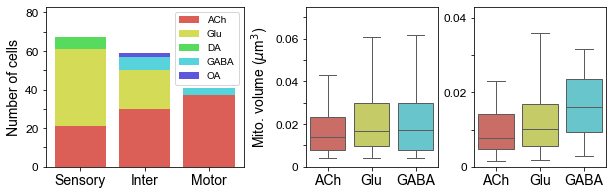

Adult mitochondria volume:
Ach-Glu: p = 0.00119570700892936
Ach-GABA: p = 0.04677392421451331

Dauer mitochondria volume:
Ach-Glu: p = 0.0020274453315791293
Ach-GABA: p = 6.690946233451283e-06
Glu-GABA: p = 0.007374135641320886


In [164]:
fig = plt.figure(figsize=(8.4,2.6), constrained_layout=True)
gs = fig.add_gridspec(1,7)

ax1 = fig.add_subplot(gs[0,:3])
plot1(ax1)

ax2 = fig.add_subplot(gs[0,3:5])
plot2(ax2)

ax3 = fig.add_subplot(gs[0,5:])
plot3(ax3)

plt.savefig("/home/jabae/Dropbox/SNU/Research/Celegans/Cmito/figures/figure_v2/panels/fig6_1.svg")
plt.show()

_, amitovol_p1 = ranksums(adult_mitovol_int[0],adult_mitovol_int[1])
_, amitovol_p2 = ranksums(adult_mitovol_int[0],adult_mitovol_int[2])
_, dmitovol_p1 = ranksums(dauer_mitovol_int[0],dauer_mitovol_int[1])
_, dmitovol_p2 = ranksums(dauer_mitovol_int[0],dauer_mitovol_int[2])
_, dmitovol_p3 = ranksums(dauer_mitovol_int[1],dauer_mitovol_int[2])


print(f"Adult mitochondria volume:\nAch-Glu: p = {amitovol_p1}\nAch-GABA: p = {amitovol_p2}\n")
print(f"Dauer mitochondria volume:\nAch-Glu: p = {dmitovol_p1}\nAch-GABA: p = {dmitovol_p2}\n\
Glu-GABA: p = {dmitovol_p3}")

## Part 2

In [15]:
def get_mitovol_frac(mito_df):
    
    n = cell_df.shape[0]
    mitovol_frac = np.zeros(n)
    for i in range(n):
        
        name = cell_df.iloc[i]["name"]
        
        valid = mito_df["cell_name"]==name
        if np.sum(valid)==0:
            continue
            
        cell_vol = mito_df[valid]["cell_vol"].values[0]
        mitovol_frac[i] = np.sum(mito_df[valid]["mito_vol"])/cell_vol
        
    return mitovol_frac

def filter_zero(arr):
    
    return arr[arr>0]

def dist(x, y):
    
    x = x.reshape((-1,3))
    y = y.reshape((-1,3))
    
    return np.sum((x-y)**2, axis=1)**0.5

def get_dist_from_syn(syn_df, mito_df, mode="pre"):
    
    if mode=="pre":
        
        syn_id_list = np.unique(syn_df["syn_id"])
        n = syn_id_list.shape[0]
        dist_from_syn = np.zeros(n)
        for i in range(n):
            
            syn_id = syn_id_list[i]
            syn_loc = syn_df[syn_df["syn_id"]==syn_id][["x_pos", "y_pos", "z_pos"]].values[0,:]/1000
            cell_id = syn_df[syn_df["syn_id"]==syn_id]["pre_common_id"].values[0]

            valid = mito_df["cell_common_id"]==cell_id
            if np.sum(valid)==0:
                continue
            mito_loc_list = mito_df[valid][["x_pos", "y_pos", "z_pos"]].values
            dist_list = dist(mito_loc_list, syn_loc)
            dist_from_syn[i] = np.min(dist_list)
            
    elif mode=="post":
        
        n = syn_df.shape[0]
        dist_from_syn = np.zeros(n)
        for i in range(n):
        
            syn_loc = syn_df.iloc[i][["x_pos", "y_pos", "z_pos"]].values/1000
            cell_id = syn_df.iloc[i]["post_common_id"]

            valid = mito_df["cell_common_id"]==cell_id
            if np.sum(valid)==0:
                continue
            mito_loc_list = mito_df[valid][["x_pos", "y_pos", "z_pos"]].values
            dist_list = dist(mito_loc_list, syn_loc)
            dist_from_syn[i] = np.min(dist_list)
    
    return dist_from_syn

def get_syn_nt(syn_df, mode="pre"):
    
    
    if mode=="pre":
        
        syn_id_list = np.unique(syn_df["syn_id"])
        n = syn_id_list.shape[0]
        syn_nt = np.zeros(n)
        for i in range(n):
            
            syn_id = syn_id_list[i]
            name = syn_df[syn_df["syn_id"]==syn_id]["pre"].values[0]
            valid = name_list==name
            if np.sum(valid):
                syn_nt[i] = ntlist[valid][0]
    
    elif mode=="post":
        
        n = syn_df.shape[0]
        syn_nt = np.zeros(n)
        for i in range(n):
            
            name = syn_df.iloc[i]["post"]
            valid = name_list==name
            if np.sum(valid):
                syn_nt[i] = ntlist[valid][0]
    
    return syn_nt

def get_syn_type(syn_df, mode="pre"):
    
    
    if mode=="pre":
        
        syn_id_list = np.unique(syn_df["syn_id"])
        n = syn_id_list.shape[0]
        syn_nt = np.zeros(n)
        for i in range(n):
            
            syn_id = syn_id_list[i]
            name = syn_df[syn_df["syn_id"]==syn_id]["pre"].values[0]
            valid = name_list==name
            if np.sum(valid):
                syn_nt[i] = type_list[valid][0]
    
    elif mode=="post":
        
        n = syn_df.shape[0]
        syn_nt = np.zeros(n)
        for i in range(n):
            
            name = syn_df.iloc[i]["post"]
            valid = name_list==name
            if np.sum(valid):
                syn_nt[i] = type_list[valid][0]
    
    return syn_nt

In [16]:
l1_mitovol_frac = get_mitovol_frac(l1_mito_df)
l2_mitovol_frac = get_mitovol_frac(l2_mito_df)
l3_mitovol_frac = get_mitovol_frac(l3_mito_df)
adult_mitovol_frac = get_mitovol_frac(adult_mito_df)
dauer_mitovol_frac = get_mitovol_frac(dauer_mito_df)

In [17]:
l1_volfrac_int = [filter_zero(l1_mitovol_frac[type_list==2][int_ntlist==i]) for i in [1,2,4]]
l2_volfrac_int = [filter_zero(l2_mitovol_frac[type_list==2][int_ntlist==i]) for i in [1,2,4]]
l3_volfrac_int = [filter_zero(l3_mitovol_frac[type_list==2][int_ntlist==i]) for i in [1,2,4]]
adult_volfrac_int = [filter_zero(adult_mitovol_frac[type_list==2][int_ntlist==i]) for i in [1,2,4]]
dauer_volfrac_int = [filter_zero(dauer_mitovol_frac[type_list==2][int_ntlist==i]) for i in [1,2,4]]

In [18]:
l1_dist_pre = get_dist_from_syn(l1_syn_df, l1_mito_df, "pre")
l2_dist_pre = get_dist_from_syn(l2_syn_df, l2_mito_df, "pre")
l3_dist_pre = get_dist_from_syn(l3_syn_df, l3_mito_df, "pre")
adult_dist_pre = get_dist_from_syn(adult_syn_df, adult_mito_df, "pre")
dauer_dist_pre = get_dist_from_syn(dauer_syn_df, dauer_mito_df, "pre")

l1_syn_ntlist_pre = get_syn_nt(l1_syn_df, "pre")
l2_syn_ntlist_pre = get_syn_nt(l2_syn_df, "pre")
l3_syn_ntlist_pre = get_syn_nt(l3_syn_df, "pre")
adult_syn_ntlist_pre = get_syn_nt(adult_syn_df, "pre")
dauer_syn_ntlist_pre = get_syn_nt(dauer_syn_df, "pre")

l1_syn_typelist_pre = get_syn_type(l1_syn_df, "pre")
l2_syn_typelist_pre = get_syn_type(l2_syn_df, "pre")
l3_syn_typelist_pre = get_syn_type(l3_syn_df, "pre")
adult_syn_typelist_pre = get_syn_type(adult_syn_df, "pre")
dauer_syn_typelist_pre = get_syn_type(dauer_syn_df, "pre")

In [19]:
valid = l1_dist_pre>0
l1_dist_pre = l1_dist_pre[valid]
l1_syn_ntlist_pre = l1_syn_ntlist_pre[valid]
l1_syn_typelist_pre = l1_syn_typelist_pre[valid]

valid = l2_dist_pre>0
l2_dist_pre = l2_dist_pre[valid]
l2_syn_ntlist_pre = l2_syn_ntlist_pre[valid]
l2_syn_typelist_pre = l2_syn_typelist_pre[valid]

valid = l3_dist_pre>0
l3_dist_pre = l3_dist_pre[valid]
l3_syn_ntlist_pre = l3_syn_ntlist_pre[valid]
l3_syn_typelist_pre = l3_syn_typelist_pre[valid]

valid = adult_dist_pre>0
adult_dist_pre = adult_dist_pre[valid]
adult_syn_ntlist_pre = adult_syn_ntlist_pre[valid]
adult_syn_typelist_pre = adult_syn_typelist_pre[valid]

valid = dauer_dist_pre>0
dauer_dist_pre = dauer_dist_pre[valid]
dauer_syn_ntlist_pre = dauer_syn_ntlist_pre[valid]
dauer_syn_typelist_pre = dauer_syn_typelist_pre[valid]

In [20]:
l1_distpre_int = [l1_dist_pre[(l1_syn_ntlist_pre==i)*(l1_syn_typelist_pre==2)] for i in [1,2,4]]
l2_distpre_int = [l2_dist_pre[(l2_syn_ntlist_pre==i)*(l2_syn_typelist_pre==2)] for i in [1,2,4]]
l3_distpre_int = [l3_dist_pre[(l3_syn_ntlist_pre==i)*(l3_syn_typelist_pre==2)] for i in [1,2,4]]
adult_distpre_int = [adult_dist_pre[(adult_syn_ntlist_pre==i)*(adult_syn_typelist_pre==2)] for i in [1,2,4]]
dauer_distpre_int = [dauer_dist_pre[(dauer_syn_ntlist_pre==i)*(dauer_syn_typelist_pre==2)] for i in [1,2,4]]

In [21]:
l1_volfrac = [filter_zero(l1_mitovol_frac[ntlist==i]) for i in [1,2]]
l2_volfrac = [filter_zero(l2_mitovol_frac[ntlist==i]) for i in [1,2]]
l3_volfrac = [filter_zero(l3_mitovol_frac[ntlist==i]) for i in [1,2]]
adult_volfrac = [filter_zero(adult_mitovol_frac[ntlist==i]) for i in [1,2]]
dauer_volfrac = [filter_zero(dauer_mitovol_frac[ntlist==i]) for i in [1,2]]

In [22]:
nach = l2_volfrac[0].shape[0]+adult_volfrac[0].shape[0]+dauer_volfrac[0].shape[0]
nglu = l2_volfrac[1].shape[0]+adult_volfrac[1].shape[0]+dauer_volfrac[1].shape[0]

volfrac_comb = np.concatenate([l2_volfrac[0],adult_volfrac[0],dauer_volfrac[0],
                l2_volfrac[1],adult_volfrac[1],dauer_volfrac[1]])
stage_comb = np.concatenate([["L2"]*l2_volfrac[0].shape[0],
                       ["Adult"]*adult_volfrac[0].shape[0],
                       ["Dauer"]*dauer_volfrac[0].shape[0],
                       ["L2"]*l2_volfrac[1].shape[0],
                       ["Adult"]*adult_volfrac[1].shape[0],
                       ["Dauer"]*dauer_volfrac[1].shape[0]])
nt_comb = np.concatenate([["ACh"]*nach, ["Glu"]*nglu])

data = {"stage": stage_comb,
        "neurotransmitter": nt_comb,
        "vol_frac": volfrac_comb}

data_df = pd.DataFrame(data=data)
data_df.head()

,stage,neurotransmitter,vol_frac
0,L2,ACh,0.035079
1,L2,ACh,0.023832
2,L2,ACh,0.030812
3,L2,ACh,0.025991
4,L2,ACh,0.033922


In [200]:
def plot4(ax):
    
    xticks = np.arange(2)
    xticklab = ["ACh", "Glu"]
    yticks = np.arange(0,4.7,1)
    yticklab = ["0","1","2","3","4"]
    
    sns.boxplot(data=adult_distpre_int[:2], whis=[5,95], showfliers=False,
                palette=[nt_cmap[0],nt_cmap[1]])
    
    ax.set_ylim(0,4.7)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklab, fontsize=14, fontname="Arial")
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklab, fontsize=12, fontname="Arial")
    ax.set_ylabel("$d_{mito}^{pre}$ ($\mu$m)", fontsize=14, fontname="Arial")

def plot5(ax):
    
    xticks = np.arange(2)
    xticklab = ["ACh", "Glu"]
    yticks = np.arange(0,0.081,0.02)
    yticklab = ["0","","0.04","","0.08"]
    
    sns.boxplot(data=adult_volfrac_int[:2], whis=[5,95], showfliers=False,
                palette=[nt_cmap[0],nt_cmap[1]])
    
    ax.set_ylim(0,0.081)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklab, fontsize=14, fontname="Arial")
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklab, fontsize=12, fontname="Arial")
    ax.set_ylabel("Mito. volume fraction", fontsize=14, fontname="Arial")
    
def plot6(ax):
    
    xticks = np.arange(3)
    xticklab = ["L2", "Adult", "Dauer"]
    yticks = np.arange(0, 0.105, 0.02)
    yticklab = ["0","","0.04","","0.08",""]
    
    sns.boxplot(data=data_df, x="stage", y="vol_frac", whis=[5,95],
                showfliers=False, hue="neurotransmitter",
                palette=[nt_cmap[0], nt_cmap[1]], gap=0.1,
                legend=False)
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklab, fontsize=14, fontname="Arial")
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklab, fontsize=12, fontname="Arial")
    ax.set_xlabel("")
    ax.set_ylabel("Mito. volume fraction", fontsize=14, fontname="Arial")

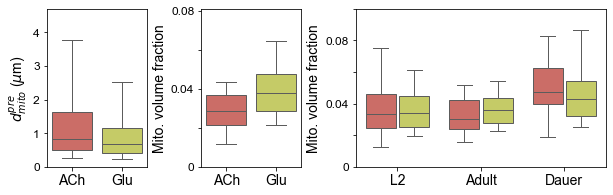

In [202]:
fig = plt.figure(figsize=(8.4,2.6), constrained_layout=True)
gs = fig.add_gridspec(1,9)

ax1 = fig.add_subplot(gs[0,:2])
plot4(ax1)

ax2 = fig.add_subplot(gs[0,2:4])
plot5(ax2)

ax3 = fig.add_subplot(gs[0,4:])
plot6(ax3)

plt.savefig("/home/jabae/Dropbox/SNU/Research/Celegans/Cmito/figures/figure_v2/panels/fig6_2.svg")
plt.show()

In [25]:
ranksums(adult_volfrac_int[0], adult_volfrac_int[1])

RanksumsResult(statistic=-2.693201316896554, pvalue=0.007076952289597478)

In [26]:
ranksums(l2_volfrac[0], dauer_volfrac[0])

RanksumsResult(statistic=-4.936631888259098, pvalue=7.948329261398323e-07)

In [27]:
ranksums(adult_volfrac[0], dauer_volfrac[0])

RanksumsResult(statistic=-5.907414312510095, pvalue=3.4751898119835986e-09)

In [34]:
ranksums(l2_volfrac[1], dauer_volfrac[1])

RanksumsResult(statistic=-2.9540883546800556, pvalue=0.003135942088653905)

In [35]:
ranksums(adult_volfrac[1], dauer_volfrac[1])

RanksumsResult(statistic=-2.9540883546800556, pvalue=0.003135942088653905)

In [33]:
ranksums(adult_volfrac[1], l2_volfrac[1])

RanksumsResult(statistic=0.4086028752267741, pvalue=0.6828311202973789)